In [0]:
!git clone https://github.com/AkshaysNimbalkar/DataLit.git

Cloning into 'DataLit'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 361 (delta 2), reused 89 (delta 1), pack-reused 268
Receiving objects: 100% (361/361), 31.71 MiB | 48.76 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [0]:
! ls


DataLit  sample_data


In [0]:
input_dir = '/content/DataLit/Week-8'
train = input_dir +'/train'
train_cleaned = input_dir + '/train_cleaned'
test = input_dir + '/test'

In [0]:
import os
# Next, check if the directories work well and shown some samples

train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))

print("Total number of images in the training set: ", len(train_images))
print("Total number of cleaned images found: ", len(train_labels))
print("Total number of samples in the test set: ", len(test_images))

Total number of images in the training set:  144
Total number of cleaned images found:  144
Total number of samples in the test set:  72


In [0]:
# Samples

samples = train_images[:2] + train_labels[:2]
samples

['101.png', '102.png', '101.png', '102.png']

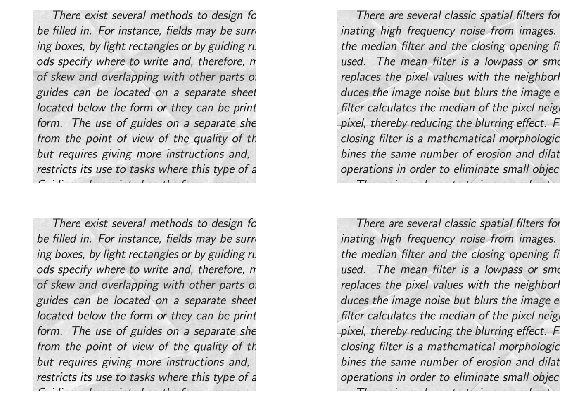

In [0]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave

s1='/'

f, ax = plt.subplots(2, 2, figsize=(10,7))
for i, img in enumerate(samples):
    img = imread(train+s1+img)
    ax[i//2, i%2].imshow(img, cmap='gray')
    ax[i//2, i%2].axis('off')
    

    plt.show()

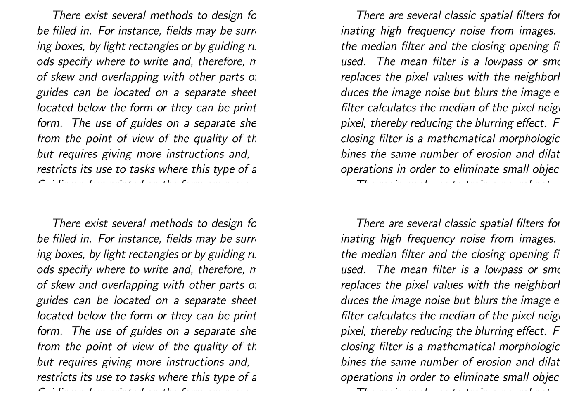

In [0]:
# cleaned Samples
s1='/'

f, ax = plt.subplots(2, 2, figsize=(10,7))
for i, img in enumerate(samples):
    img = imread(train_cleaned+s1+img)
    ax[i//2, i%2].imshow(img, cmap='gray')
    ax[i//2, i%2].axis('off')
    
plt.show()

In [0]:

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad

# This is structure of autoecoder and can be noticed bottleneck in middle

def build_autoenocder():
  input_img = Input(shape=(420,540,1), name='image_input')
  
  #encoder 
  x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
  x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
  x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
  
  
  #decoder
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
  x = UpSampling2D((2,2), name='upsample1')(x)
  x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
  x = UpSampling2D((2,2), name='upsample2')(x)
  x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
  
  
  #model
  autoencoder = Model(inputs=input_img, outputs=x)
  autoencoder.compile(optimizer='sgd', loss='binary_crossentropy')
  return autoencoder

In [59]:
#We can see a summary of our autoencoder defined in this case we use the Stochastic Gradient Descent algorithm (sgd) as optimizer

autoencoder = build_autoenocder()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 210, 270, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 105, 135, 64)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 105, 135, 64)      36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 210, 270, 64)      0         
__________

In [36]:
import numpy as np
from keras.preprocessing.image import load_img, array_to_img, img_to_array
#from keras import backend as K

X = []
Y = []

for img in train_images:
    img = load_img(train +s1+ img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_cleaned +s1+ img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)


X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)


In [38]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and validation. Always set the random state!!

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


In [60]:
# Train model

autoencoder.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_valid, y_valid))

Train on 129 samples, validate on 15 samples
Epoch 1/30
129/129 [==============================] - 2s 18ms/step - loss: 0.6121 - val_loss: 0.5172
Epoch 2/30
129/129 [==============================] - 2s 14ms/step - loss: 0.4270 - val_loss: 0.3636
Epoch 3/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3504 - val_loss: 0.3550
Epoch 4/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3472 - val_loss: 0.3545
Epoch 5/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3466 - val_loss: 0.3539
Epoch 6/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3461 - val_loss: 0.3534
Epoch 7/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3456 - val_loss: 0.3530
Epoch 8/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3451 - val_loss: 0.3524
Epoch 9/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3447 - val_loss: 0.3519
Epoch 10/30
129/129 [=========================

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


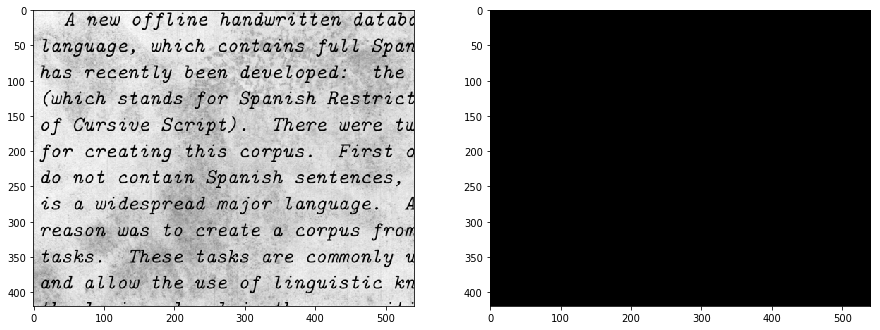

In [61]:

# With the model trainied we see the results on and image

sample_test = load_img(test +s1+test_images[11], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)


predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(15,16))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()

In [0]:
# In this case the image resultant doesn't satisfy our requirement, in fact the model erase all the image as if all is noise xD (it's the first test so) , so next there are others experiments to improve this results.

In [0]:
# Now we define the autoencoder but using the Adam optimizer

def build_autoenocder():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [44]:
autoencoder = build_autoenocder()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 210, 270, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 105, 135, 64)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 105, 135, 64)      36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 210, 270, 64)      0         
__________

In [45]:
# Train the model with the new optimizer

autoencoder.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_valid, y_valid))

Train on 129 samples, validate on 15 samples
Epoch 1/20
129/129 [==============================] - 8s 63ms/step - loss: 0.6388 - val_loss: 0.4395
Epoch 2/20
129/129 [==============================] - 2s 14ms/step - loss: 0.4039 - val_loss: 0.3985
Epoch 3/20
129/129 [==============================] - 2s 14ms/step - loss: 0.3681 - val_loss: 0.3805
Epoch 4/20
129/129 [==============================] - 2s 14ms/step - loss: 0.3622 - val_loss: 0.3625
Epoch 5/20
129/129 [==============================] - 2s 14ms/step - loss: 0.3497 - val_loss: 0.3502
Epoch 6/20
129/129 [==============================] - 2s 14ms/step - loss: 0.3399 - val_loss: 0.3407
Epoch 7/20
129/129 [==============================] - 2s 15ms/step - loss: 0.3278 - val_loss: 0.3247
Epoch 8/20
129/129 [==============================] - 2s 15ms/step - loss: 0.3097 - val_loss: 0.3015
Epoch 9/20
129/129 [==============================] - 2s 15ms/step - loss: 0.2868 - val_loss: 0.2768
Epoch 10/20
129/129 [=========================

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


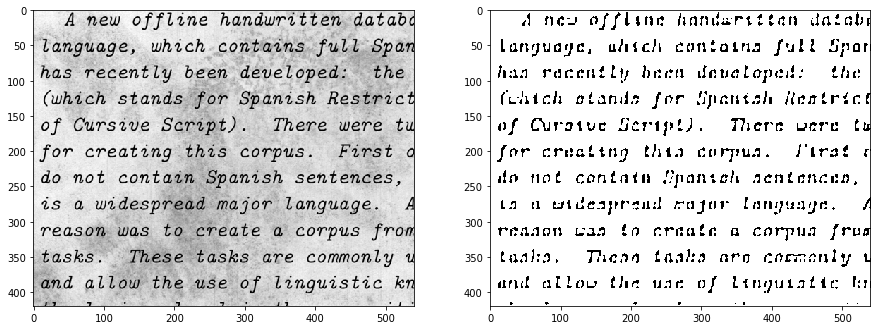

In [50]:
# Plot the results 


sample_test = load_img(test +s1+test_images[11], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(15,16))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()

In [51]:
# Now the results are better and we are in the right way, so next we try with a more epochs to improve their results.

autoencoder = build_autoenocder()

autoencoder.fit(X_train, y_train, epochs=30, batch_size=20, validation_data=(X_valid, y_valid))

Train on 129 samples, validate on 15 samples
Epoch 1/30
129/129 [==============================] - 2s 18ms/step - loss: 0.5264 - val_loss: 0.4261
Epoch 2/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3824 - val_loss: 0.3709
Epoch 3/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3590 - val_loss: 0.3545
Epoch 4/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3447 - val_loss: 0.3442
Epoch 5/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3311 - val_loss: 0.3273
Epoch 6/30
129/129 [==============================] - 2s 14ms/step - loss: 0.3090 - val_loss: 0.2933
Epoch 7/30
129/129 [==============================] - 2s 14ms/step - loss: 0.2730 - val_loss: 0.2598
Epoch 8/30
129/129 [==============================] - 2s 15ms/step - loss: 0.2467 - val_loss: 0.2421
Epoch 9/30
129/129 [==============================] - 2s 15ms/step - loss: 0.2313 - val_loss: 0.2292
Epoch 10/30
129/129 [=========================

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


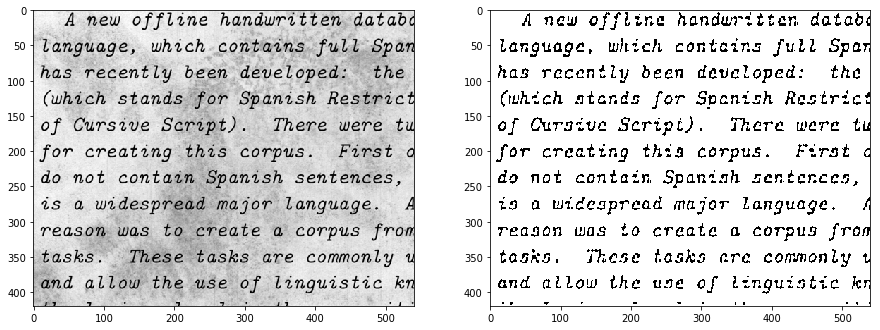

In [52]:
# Let's test our model on a sample test image
sample_test = load_img(test +s1+test_images[11], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(15,16))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()